In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
%matplotlib inline
random.seed(10)

In [415]:
sales_csv = pd.read_csv('/home/vladka/Downloads/sales.csv', header=0, delimiter=',')
sku_csv = pd.read_csv('/home/vladka/Downloads/sku.csv', header=0, delimiter=',')
geo_params_csv = pd.read_csv('/home/vladka/Downloads/geo_params.csv', header=0, delimiter=',')

In [416]:
sales = pd.DataFrame(sales_csv)
sku = pd.DataFrame(sku_csv)
geo_params = pd.DataFrame(geo_params_csv)

In [417]:
sales.head()

,ID,geoCluster,SKU,date,price,sales
0,RR27956459,92,32485,2021-07-05,38.29,4.0
1,RR27956474,92,32549,2021-07-05,89.39,0.5
2,RR27956489,112,32485,2021-05-27,45.39,3.7
3,RR27956490,112,32485,2021-05-28,NaN,NaN
4,RR27956491,112,32485,2021-05-29,NaN,NaN


In [418]:
sku.head()

,SKU,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group
0,24,Pomegranate,Tropical fruit — Pomegranate— Plain,NaN,1.0,NaN,NaN,NaN,Tropical fruits
1,208,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,1241.0,1.5,NaN,3670.0,1.0,Mineral water
2,1008,"Water, import, sparkling",Therapeutic-table water — Import — Glass,1241.0,0.5,NaN,4970.0,14.0,Mineral water
3,16649,"Water, still",Table water — PET — from 1 to 2 L — Still,1241.0,1.5,NaN,1323.0,1.0,Mineral water
4,20872,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,2693.0,1.5,NaN,4384.0,1.0,Mineral water


In [419]:
geo_params.head()

,geoCluster,cityId
0,21,1
1,47,1
2,48,1
3,92,1
4,112,1


In [420]:
sales.isnull().sum()

ID                  0
geoCluster          0
SKU                 0
date                0
price         3827619
sales         3827619
dtype: int64

In [421]:
sku.isnull().sum()

SKU                   0
Category              5
Type                  5
brandId              28
lagerUnitQuantity     0
Units                60
trademark            11
countryOfOrigin      27
Group                 0
dtype: int64

In [422]:
geo_params.isnull().sum()

geoCluster    0
cityId        0
dtype: int64

In [423]:
sales.count()

ID            4605985
geoCluster    4605985
SKU           4605985
date          4605985
price          778366
sales          778366
dtype: int64

In [424]:
sales.dropna(axis=0, how='any', inplace=True)

In [425]:
sales.count()

ID            778366
geoCluster    778366
SKU           778366
date          778366
price         778366
sales         778366
dtype: int64

In [426]:
sku.dropna(axis=1, how='all', inplace=True)

In [427]:
sku.count()

SKU                  60
Category             55
Type                 55
brandId              32
lagerUnitQuantity    60
trademark            49
countryOfOrigin      33
Group                60
dtype: int64

In [430]:
sku_Tropical_fruits_subset = sku

In [431]:
sku_Tropical_fruits_subset

,SKU,Category,Type,brandId,lagerUnitQuantity,trademark,countryOfOrigin,Group
0,24,Pomegranate,Tropical fruit — Pomegranate— Plain,NaN,1.00,NaN,NaN,Tropical fruits
1,208,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,1241.0,1.50,3670.0,1.0,Mineral water
2,1008,"Water, import, sparkling",Therapeutic-table water — Import — Glass,1241.0,0.50,4970.0,14.0,Mineral water
3,16649,"Water, still",Table water — PET — from 1 to 2 L — Still,1241.0,1.50,1323.0,1.0,Mineral water
4,20872,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,2693.0,1.50,4384.0,1.0,Mineral water
5,26194,Semi-hard coarse-pored cheese,semi-hard cheese — More expensive — National —...,2737.0,1.00,4891.0,16.0,Cheese
6,32485,Banana,Banana — Plain,NaN,1.00,NaN,NaN,Tropical fruits
7,32490,Avocado,Tropical fruit — Avocado,NaN,1.00,NaN,NaN,Tropical fruits
8,32546,Orange,Citrus fruit — Orange — Plain,NaN,1.00,NaN,NaN,Tropical fruits
9,32549,Grapefruit,Citrus fruit — Grapefruit — Plain,NaN,1.00,NaN,NaN,Tropical fruits


In [432]:
sales_tropical_fruits = pd.merge(sku_Tropical_fruits_subset, sales, how="inner", on=["SKU", "SKU"])

In [433]:
sales_tropical_fruits.dropna(axis=1, how='all', inplace=True)

In [434]:
sales_tropical_fruits.count()

SKU                  778366
Category             721023
Type                 721023
brandId              378001
lagerUnitQuantity    778366
trademark            555637
countryOfOrigin      385781
Group                778366
ID                   778366
geoCluster           778366
date                 778366
price                778366
sales                778366
dtype: int64

In [435]:
sales_tropical_fruits = sales_tropical_fruits.groupby(['SKU', 'date']).sum()
sales_tropical_fruits

brandId  lagerUnitQuantity  trademark  countryOfOrigin  \
SKU    date                                                                 
24     2020-04-04      0.0                1.0        0.0              0.0   
       2020-04-06      0.0                1.0        0.0              0.0   
       2020-04-07      0.0                2.0        0.0              0.0   
       2020-04-08      0.0                5.0        0.0              0.0   
       2020-04-09      0.0                5.0        0.0              0.0   
...                    ...                ...        ...              ...   
838137 2021-07-01      0.0               28.0   270648.0              0.0   
       2021-07-02      0.0               28.0   270648.0              0.0   
       2021-07-03      0.0               37.0   357642.0              0.0   
       2021-07-04      0.0               37.0   357642.0              0.0   
       2021-07-05      0.0               50.0   483300.0              0.0   

                   geoCluster    price  sales  
SKU    date                                    
24     2020-04-04        2215   105.19    4.1  
       2020-04-06        2043   109.39    2.4  
       2020-04-07        4187   218.78    6.2  
       2020-04-08       10882   542.75    9.2  
       2020-04-09       11312   542.75    9.5  
...                       ...      ...    ...  
838137 2021-07-01       63680  1794.22  105.0  
       2021-07-02       61021  1738.23   94.0  
       2021-07-03       80016  2369.03  136.0  
       2021-07-04       82512  2408.03  159.0  
       2021-07-05      110950  3229.80  171.0  

[26124 rows x 7 columns]

<AxesSubplot:>

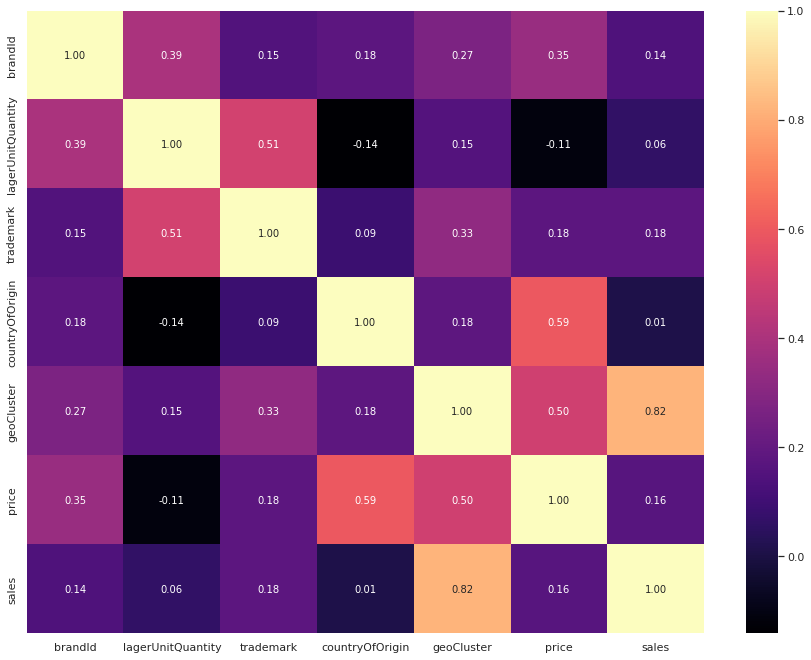

In [436]:
plt.figure(figsize=(12,10))
sn.heatmap(sales_tropical_fruits.corr(),annot=True,cmap="magma",fmt='.2f')

Check how many districts we have in our data set.

In [437]:
geo_params['geoCluster'].unique()

array([  21,   47,   48,   92,  112,  113,  117,  131,  148,  149,  162,
        189,  199,  260,  282,  285,  286,  287,  288,  294,  298,  310,
        318,  320,  323,  367,  434,  440,  444,  445,  446,  447,  455,
        459,  468,  479,  488,  491,  493,  496,  508,  549,  555,  563,
        565,  596,  598,  599,  607,  608,  611,  613,  645,  681,  682,
        683,  685,  687,  691,  736,  744,  859,  860,  942,  954,  988,
        991,  999, 1241, 1246, 1283, 1297, 1301, 1315, 1316, 1317, 1321,
       1326, 1327, 1336, 1609, 1619, 1621, 1622, 1624, 1629, 1634, 1635,
       1636, 1637, 1664, 1665, 1666, 1672, 1673, 1677, 1689, 1690, 1694,
       1702, 1703, 1704, 1705, 1735, 1736, 1737, 1738, 1743, 1747, 1752,
       1755, 1759, 1774, 1778, 1780, 1781, 1782, 1789, 1790, 1795, 1828,
       1846, 1850, 1851, 1859, 1860, 1862, 1865, 1866, 1867, 1868, 1874,
       1876, 1879, 1883, 1886, 1887, 1893, 1894, 1913, 1928, 1929, 1934,
       1935, 1974, 1990, 1991, 1992, 1993, 1994, 19

In [438]:
len(geo_params['geoCluster'].unique())

515

Check amount of cities in data set

In [439]:
geo_params['cityId'].unique()

array([ 1, 25,  0])

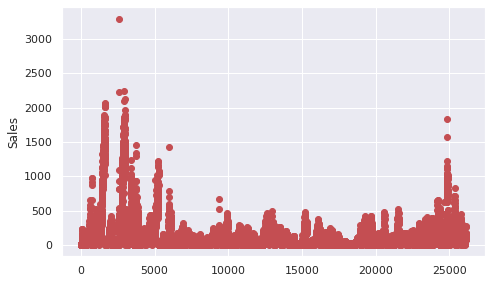

In [440]:
plt.plot( sales_tropical_fruits['sales'].array, 'ro')
plt.ylabel('Sales')
plt.show()

In [441]:
outliers_set=[]
def detect_outlier(some_data):
    
    threshold=3
    mean_1 = np.mean(some_data)
    std_1 =np.std(some_data)
    
    
    for y in some_data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers_set.append(y)
    return outliers_set

In [442]:
sales_ounliers = detect_outlier(sales_tropical_fruits['sales'])

In [443]:
ounliers_fraction_sales = len(sales_ounliers)/sales_tropical_fruits['sales'].count()
ounliers_fraction_sales

0.02277599142550911

In [444]:
sales_tropical_fruits.count()

brandId              26124
lagerUnitQuantity    26124
trademark            26124
countryOfOrigin      26124
geoCluster           26124
price                26124
sales                26124
dtype: int64

In [445]:
sales_tropical_fruits = sales_tropical_fruits[sales_tropical_fruits.sales.isin(sales_ounliers) == False]

In [446]:
sales_tropical_fruits.count()

brandId              25529
lagerUnitQuantity    25529
trademark            25529
countryOfOrigin      25529
geoCluster           25529
price                25529
sales                25529
dtype: int64

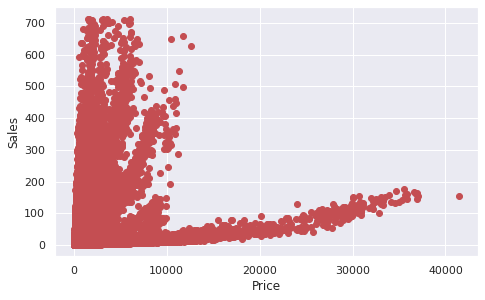

In [447]:
plt.plot(sales_tropical_fruits['price'].array, sales_tropical_fruits['sales'].array, 'ro')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

In [448]:
price_ounliers = detect_outlier(sales_tropical_fruits['price'])

In [449]:
ounliers_fraction_price = len(sales_ounliers)/sales_tropical_fruits['sales'].count()
ounliers_fraction_price

0.0437149907947824

In [450]:
sales_tropical_fruits = sales_tropical_fruits[sales_tropical_fruits.price.isin(price_ounliers) == False]

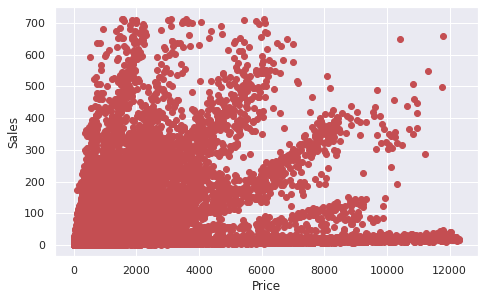

In [451]:
plt.plot(sales_tropical_fruits['price'].array, sales_tropical_fruits['sales'].array, 'ro')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

Divide the data on train and test sets for Linear models and ect.

In [452]:
sales_tropical_fruits = sales_tropical_fruits.reset_index()
sales_tropical_fruits.groupby('date')

In [453]:
sales_tropical_fruits.groupby('date').sum()

,SKU,brandId,lagerUnitQuantity,trademark,countryOfOrigin,geoCluster,price,sales
date,,,,,,,,
2020-01-27,534443,1241.0,0.75,4970.0,14.0,2065,40.59,1.000
2020-02-26,233272,2737.0,1.00,1839.0,14.0,2065,32.79,2.000
2020-02-27,233272,2737.0,1.00,1839.0,14.0,2065,32.79,2.000
2020-03-03,233272,2737.0,1.00,1839.0,14.0,2065,36.89,2.000
2020-04-01,787133,0.0,2.00,9666.0,0.0,2016,79.59,4.000
...,...,...,...,...,...,...,...,...
2021-07-01,22337350,3871100.0,305181.00,12409140.0,4143.0,4848457,116941.31,6694.057
2021-07-02,22337350,3787528.0,304090.25,12248520.0,4261.0,4901640,118583.66,6957.830
2021-07-03,22240496,4066607.0,326922.25,12890180.0,4965.0,4984058,117225.01,6786.550


In [454]:
X_train, X_test, y_train, y_test = train_test_split(sales_tropical_fruits[['geoCluster','SKU',  'price']], 
                                                    sales_tropical_fruits[['sales','SKU']], test_size=0.3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(sales_tropical_fruits.loc[:, sales_tropical_fruits.columns != 'sales'], 
                                                    sales_tropical_fruits['sales'], test_size=0.3, random_state=0)

In [455]:
X_train_limon, X_test_limon, y_train_limon, y_test_limon = (X_train[X_train['SKU'] == 32550],
                                                            X_test[X_test['SKU'] == 32550], 
                                                            y_train[y_train['SKU'] == 32550], 
                                                            y_test[y_test['SKU'] == 32550])

Make a linearmode for limon

In [456]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_limon, y_train_limon['sales'])
predicted = model.predict(X_test_limon)
model.score(X_train_limon, y_train_limon['sales'])

0.9687751399722195

In [457]:
import sklearn
test_LinearRegression = round(sklearn.metrics.r2_score(y_test_limon['sales'], predicted), 2)
print("LinearRegression test score = ", test_LinearRegression)

LinearRegression test score =  0.96


In [458]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train_limon, y_train_limon['sales'])
predicted = model.predict(X_test_limon)
model.score(X_train_limon, y_train_limon['sales'])


0.992779955671596

In [459]:
test_GradientBoostingRegressor = round(sklearn.metrics.r2_score(y_test_limon['sales'], predicted), 2)
print("Gradient Boosting Regressor = ", test_GradientBoostingRegressor)

Gradient Boosting Regressor =  0.97


In [460]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train_limon, y_train_limon['sales'])
predicted = model.predict(X_test_limon)
model.score(X_train_limon, y_train_limon['sales'])

0.9961163255601204

In [461]:
test_RandomForestRegressor = round(sklearn.metrics.r2_score(y_test_limon['sales'], predicted), 2)
print("Random Forest Regressor score = ", test_RandomForestRegressor)

Random Forest Regressor score =  0.97


# Predicting new data region

In [462]:
SKU_of_all_products = sales_tropical_fruits['SKU'].unique()

In [463]:
X_train, X_test, y_train, y_test = train_test_split(sales_tropical_fruits[['geoCluster','SKU',  'price']], 
                                                    sales_tropical_fruits[['sales','SKU']], test_size=0.3, random_state=0)

In [464]:
for k in SKU_of_all_products:
        X_train_limon, X_test_limon, y_train_limon, y_test_limon = (X_train[X_train['SKU'] == k],
                                                            X_test[X_test['SKU'] == k], 
                                                            y_train[y_train['SKU'] == k], 
                                                            y_test[y_test['SKU'] == k])
        model = GradientBoostingRegressor().fit(X_train_limon, y_train_limon['sales'])
        predicted = model.predict(X_test_limon)
        test_LinearRegression = round(sklearn.metrics.r2_score(y_test_limon['sales'], predicted), 2)
        print("LinearRegression test score = ", test_LinearRegression, k)

LinearRegression test score =  0.97 24
LinearRegression test score =  0.93 208
LinearRegression test score =  0.95 1008
LinearRegression test score =  0.86 16649
LinearRegression test score =  0.96 20872
LinearRegression test score =  0.95 26194
LinearRegression test score =  0.77 32485
LinearRegression test score =  0.97 32490
LinearRegression test score =  0.97 32546
LinearRegression test score =  0.98 32549
LinearRegression test score =  0.97 32550
LinearRegression test score =  0.96 39465
LinearRegression test score =  0.94 47330
LinearRegression test score =  0.96 49207
LinearRegression test score =  0.9 49450
LinearRegression test score =  0.93 67802
LinearRegression test score =  0.93 89074
LinearRegression test score =  0.93 96123
LinearRegression test score =  0.94 134544
LinearRegression test score =  0.7 144184
LinearRegression test score =  0.97 219078
LinearRegression test score =  0.94 219149
LinearRegression test score =  0.97 221793
LinearRegression test score =  0.96 2

In [527]:
final_test_data_csv = pd.read_csv('/home/vladka/Downloads/test.csv', header=0, delimiter=',')
final_test_data = pd.DataFrame(final_test_data_csv)

In [528]:
final_test_data.rename(columns = {'price_filled':'price'}, inplace = True)

In [529]:
ID_list = list()
predicted_test_data_list = list()

In [530]:
for k in SKU_of_all_products:
        X_train_limon, X_test_limon, y_train_limon, y_test_limon = (X_train[X_train['SKU'] == k],
                                                            X_test[X_test['SKU'] == k], 
                                                            y_train[y_train['SKU'] == k], 
                                                            y_test[y_test['SKU'] == k])
        model = GradientBoostingRegressor().fit(X_train_limon, y_train_limon['sales'])
        predicted = model.predict(X_test_limon)
        test_LinearRegression = round(sklearn.metrics.r2_score(y_test_limon['sales'], predicted), 2)
        print("LinearRegression test score = ", test_LinearRegression, k)
        sub_set = final_test_data[final_test_data['SKU'] == k]
        predicted_test = model.predict(sub_set[['geoCluster', 'SKU', 'price']])
        ID_list.append(sub_set['ID'])
        predicted_test_data_list.append(predicted_test)

LinearRegression test score =  0.97 24
LinearRegression test score =  0.93 208
LinearRegression test score =  0.94 1008
LinearRegression test score =  0.86 16649
LinearRegression test score =  0.96 20872
LinearRegression test score =  0.95 26194
LinearRegression test score =  0.77 32485
LinearRegression test score =  0.97 32490
LinearRegression test score =  0.97 32546
LinearRegression test score =  0.98 32549
LinearRegression test score =  0.97 32550
LinearRegression test score =  0.96 39465
LinearRegression test score =  0.94 47330
LinearRegression test score =  0.96 49207
LinearRegression test score =  0.9 49450
LinearRegression test score =  0.93 67802
LinearRegression test score =  0.93 89074
LinearRegression test score =  0.94 96123
LinearRegression test score =  0.94 134544
LinearRegression test score =  0.74 144184
LinearRegression test score =  0.97 219078
LinearRegression test score =  0.94 219149
LinearRegression test score =  0.97 221793
LinearRegression test score =  0.96 

In [595]:
for i in range(len(ID_list)):
    for k in range(len(ID_list[i])):
        result = np.where(ID_list[i].array[k] == final_test_data['ID'])
        final_test_data.at[result[0][0],'sales'] =  predicted_test_data_list[i][k];
    print(i)
        
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [598]:
from pathlib import Path  
filepath = Path('/home/vladka/Downloads/test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_test_data.to_csv(filepath)

In [109]:
sales_tropical_fruits['SKU'].unique()

array([    24,  32485,  32490,  32546,  32549,  32550,  49207,  96123,
       134544, 144184, 787133, 815381, 838137])

In [89]:
avocado = sales_tropical_fruits[sales_tropical_fruits['SKU']== 838137]

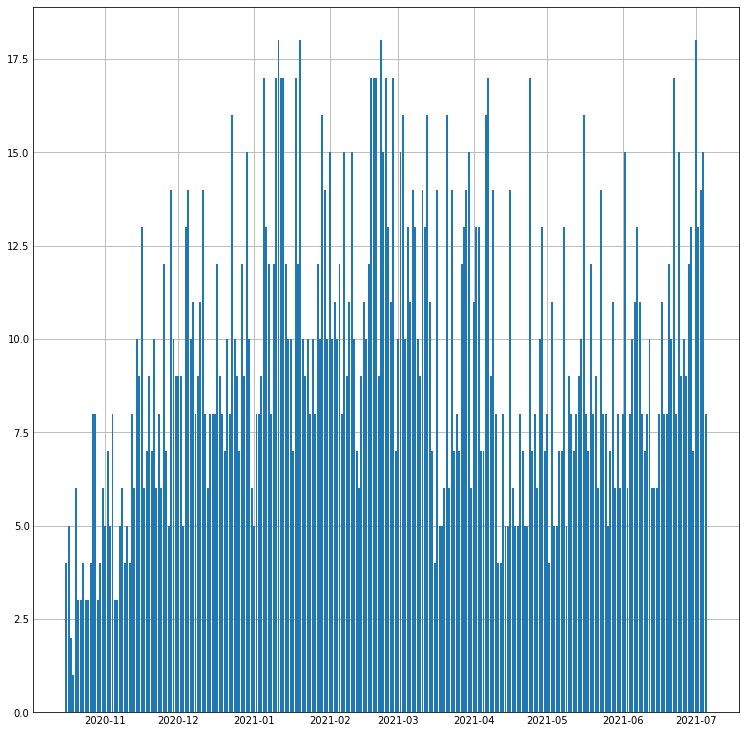

In [105]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10, 10))

ax.bar( avocado['date'], avocado[ 'sales'])

plt.show()

In [112]:
lemon = sales_tropical_fruits[sales_tropical_fruits['SKU']== 32550]

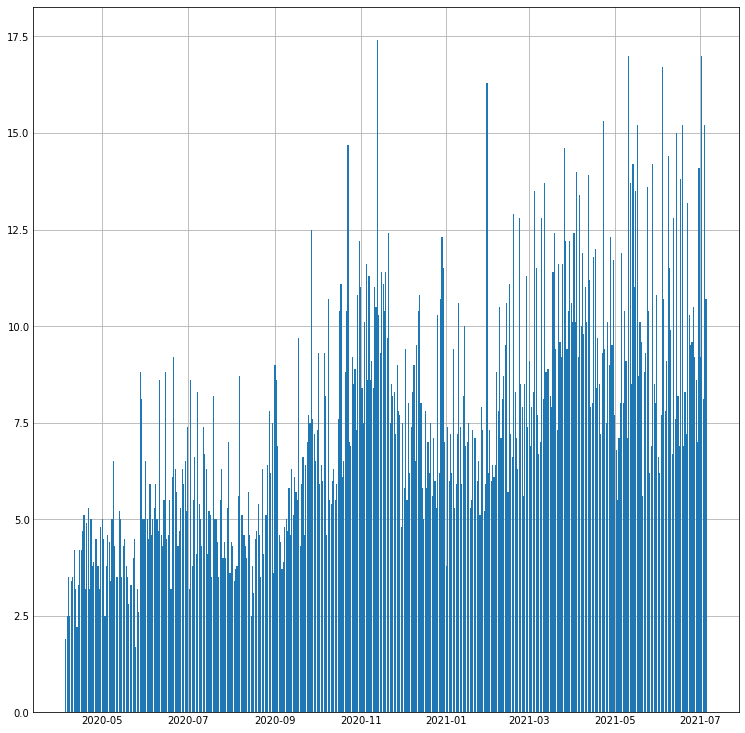

In [113]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10, 10))

ax.bar( lemon['date'], lemon[ 'sales'])

plt.show()

In [106]:
pomegranate = sales_tropical_fruits[sales_tropical_fruits['SKU']== 32490]

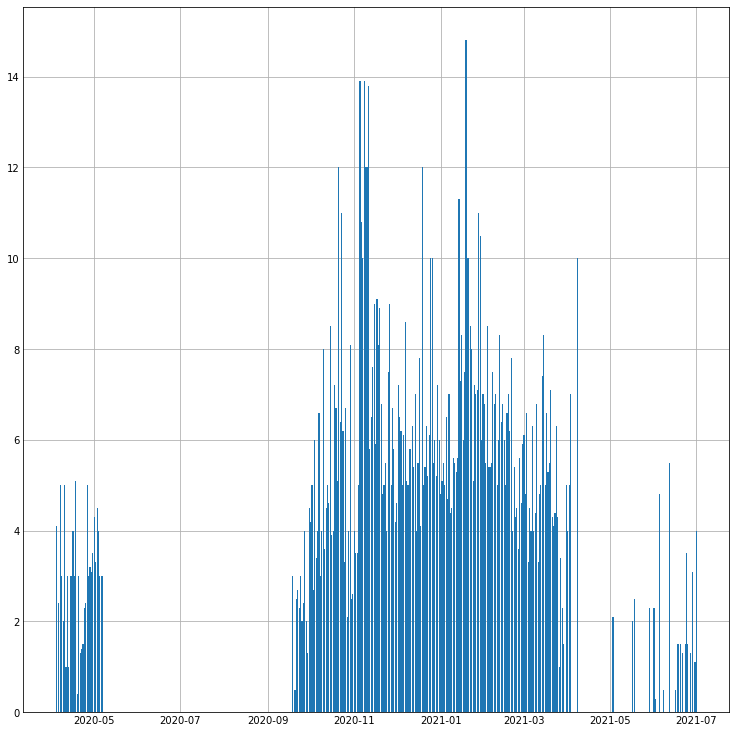

In [107]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10, 10))

ax.bar( pomegranate['date'], pomegranate[ 'sales'])

plt.show()

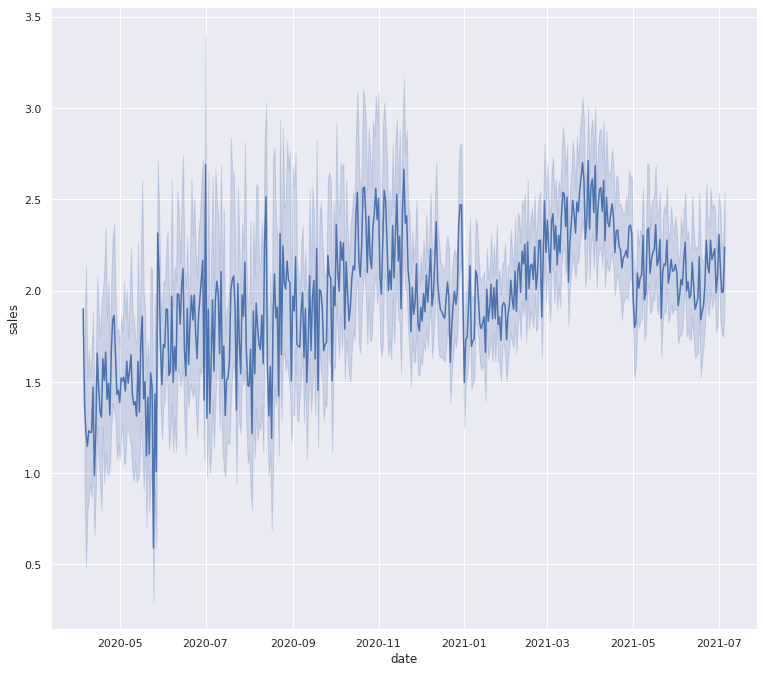

In [122]:
sns.lineplot(x=lemon['date'], y=lemon['sales'])
sns.set(rc = {'figure.figsize':(15,15)})

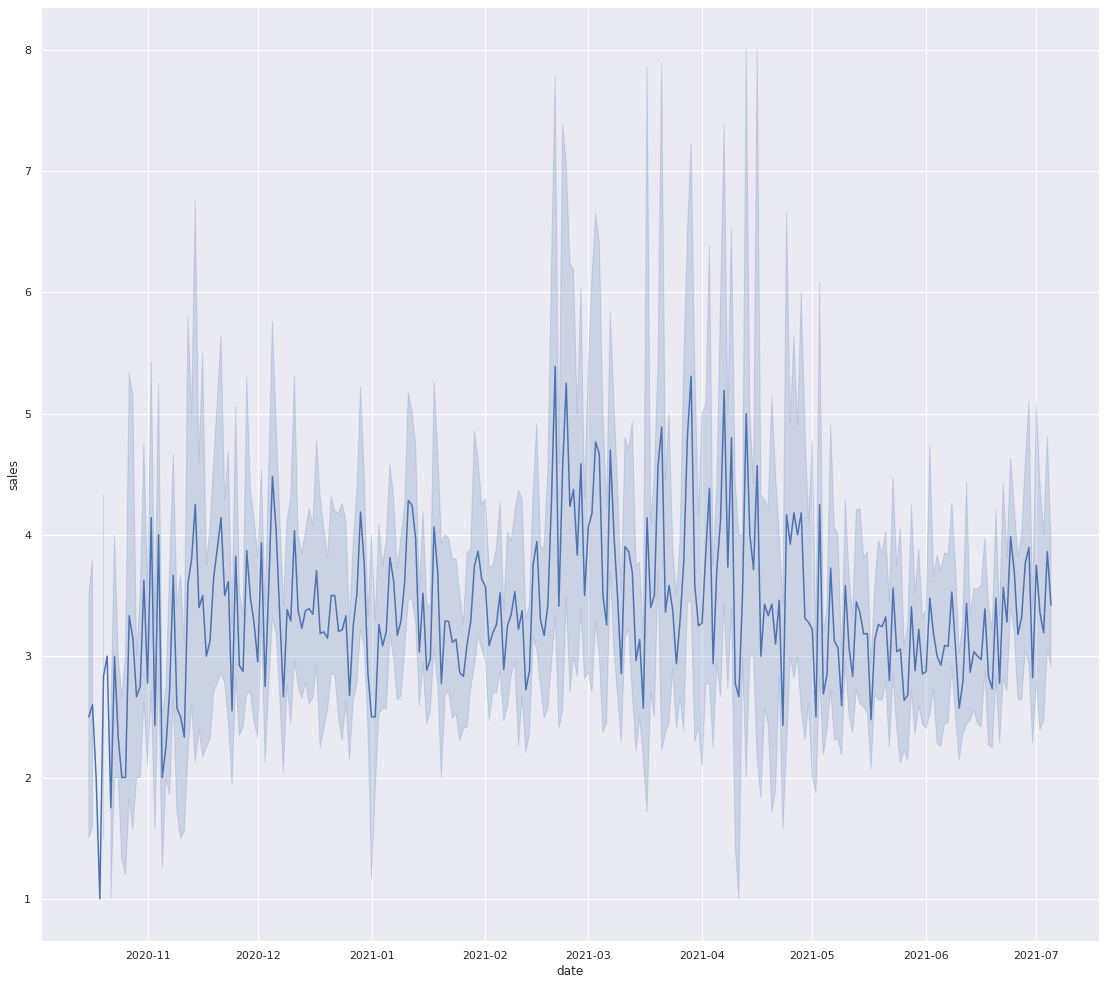

In [123]:
sns.lineplot(x=avocado['date'], y=avocado['sales'])
sns.set(rc = {'figure.figsize':(15,15)})

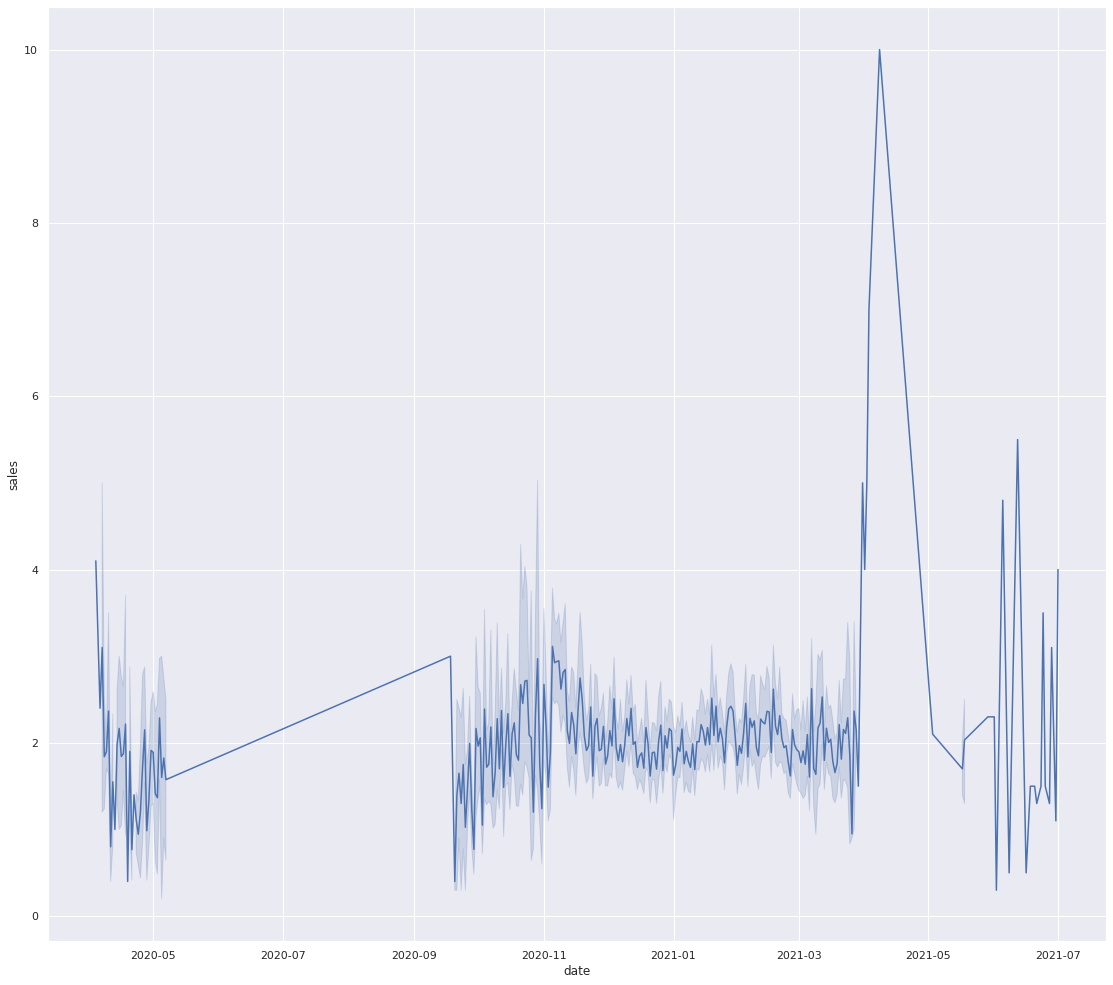

In [131]:
sns.lineplot(x=pomegranate['date'], y=pomegranate['sales'])
sns.set(rc = {'figure.figsize':(15,15)})

Descriptive statistics. This is usually done by splitting the data into two or more partitions and calculating the mean and variance for each group. If these first-order moments are consistent among these partitions, then we can assume that the data is stationary.

values = lemon[['date', 'sales']].values
 
amount_of_parts = int(len(values)/3)

part_1 = values[0:amount_of_parts]
part_2 =  values[amount_of_parts:(amount_of_parts*2)]
part_3 = values[(amount_of_parts*2):(amount_of_parts*3)]

mean_1 = part_1[:,1].mean()
mean_2 = part_2[:,1].mean()
mean_3 = part_3[:,1].mean()
 

var_1 = part_1[:,1].var()
var_2 = part_2[:,1].var()
var_3 = part_3[:,1].var()
 

print('mean1 = %f, mean2 = %f, mean3 = %f' % (mean_1, mean_2, mean_3))

print('variance1 = %f, variance2 = %f, variance3 = %f' % (var_1, var_2, var_3))


Augmented Dickey-Fuller test
This is a statistical test that is dedicatedly built to test whether univariate time series data is
stationary or not. This test is based on a hypothesis and can tell us the degree of probability to 
which it can be accepted.
Ho (Null Hypothesis): The time series data is non-stationary
H1 (alternate Hypothesis): The time series data is stationary
    The test results are interpreted with a p-value if p > 0.05 fails to reject the null hypothesis, 
    else if p <= 0.05 reject the null hypothesis. 

In [161]:
from statsmodels.tsa.stattools import adfuller
values = lemon['sales'].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -12.876638
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [162]:
from statsmodels.tsa.stattools import adfuller
values = avocado['sales'].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -5.939006
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [163]:
from statsmodels.tsa.stattools import adfuller
values = sales_tropical_fruits['sales'].values
res = adfuller(values)
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -26.180853
p-value: 0.000000
critical values at different levels:
	1%: -3.430
	5%: -2.862
	10%: -2.567


P-value is less than 5 percent and the test statistic is less than the critical value. We can reject the 
Null Hypothesis that our data is non-stationary.

Next is checking for autocorrelation in time series data. This is a measure of how correlated
time series data is at a given point in time with past values.

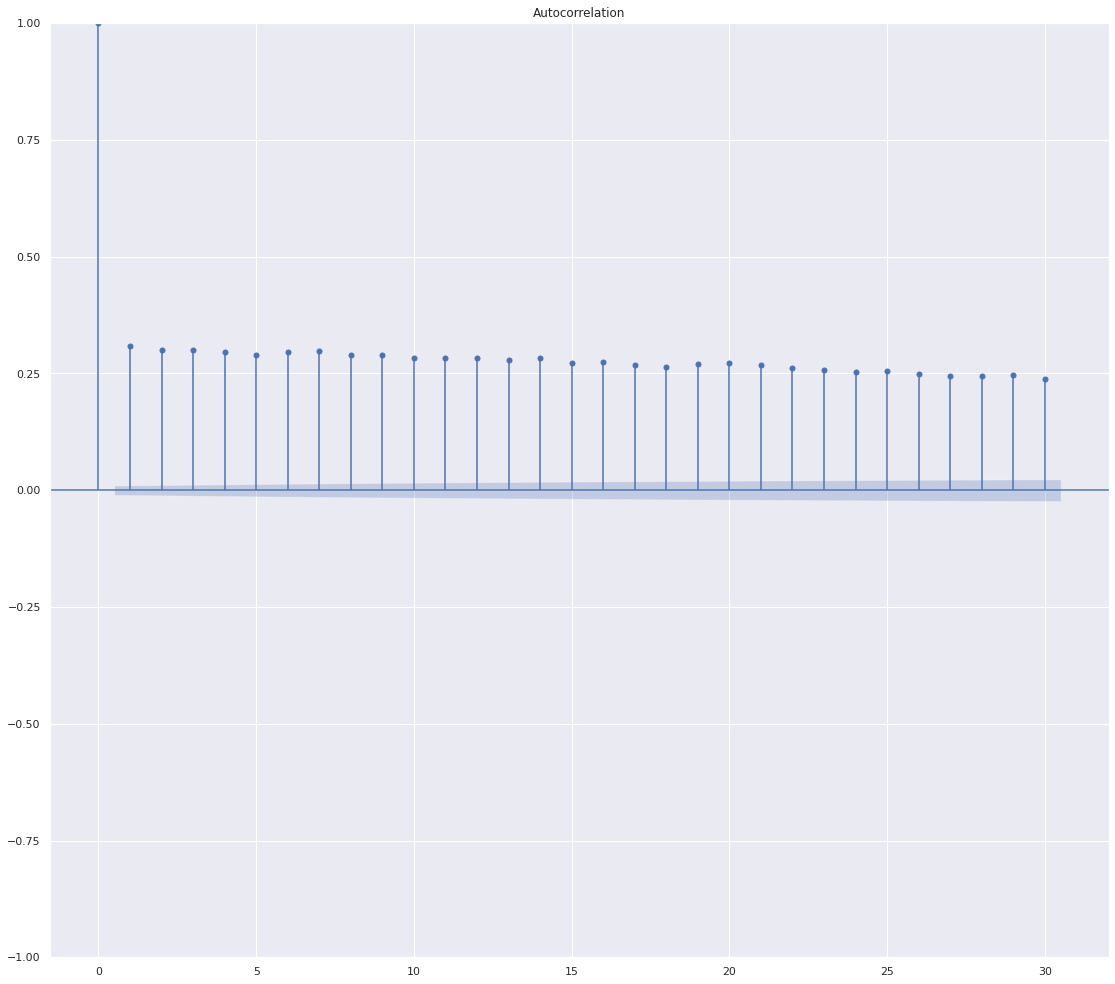

In [171]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x=lemon['sales'], lags=30)
plt.show()

In [258]:
d = {'col1': ['A','A', 'B', 'B'], 'col2': ['C', 'r', 'D', 'i'], 'col3': [1, 3, 5, 7]}
df = pd.DataFrame(data=d)

In [259]:
df2 = df.groupby(['col1', 'col2']).sum()
print(df2)

           col3
col1 col2      
A    C        1
     r        3
B    D        5
     i        7


As can be seen from the graphic, there is no correlation with previous data. 

In [ ]:
Time serias is a combination of level, trend, seasonality, and noise components in data. Decomposition is a 
process of dividing data into components such as level, trend, seasonality, and noise.

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose

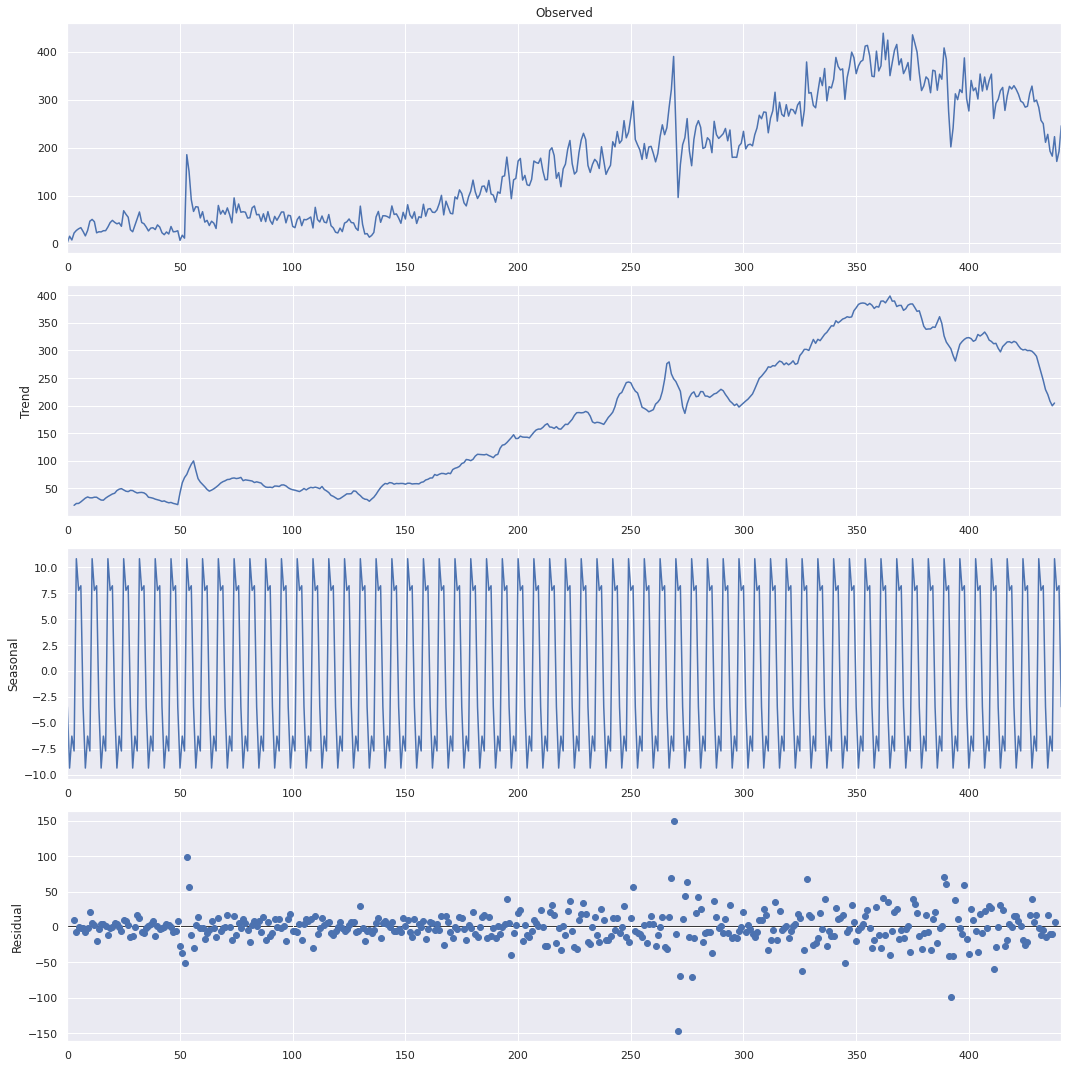

In [289]:
decompose = seasonal_decompose(df2['sales'].array,model='additive', period = 7 )
decompose.plot()
plt.show()

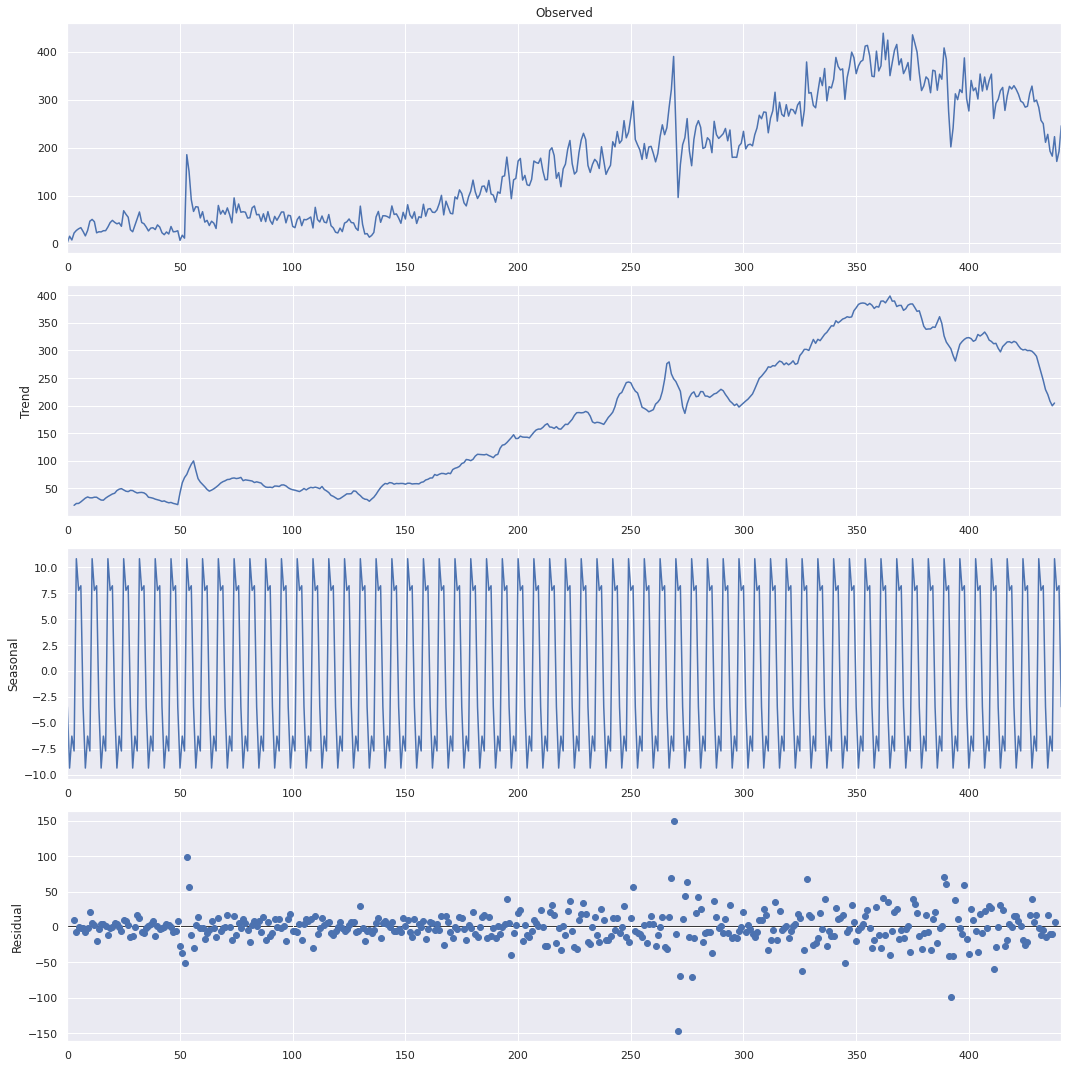

In [290]:
decompose = seasonal_decompose(df2['sales'].array,model='additive', period = 7 )
decompose.plot()
plt.show()

Decomposition of the data provides us with lack of usefull information. Picture of seasonality gives us nothing, resid is almost staible during whole period, the grafic of trend said us nothing about trend in data.

Let`s try to make a prediction with help of ARIMA model. The time period of prediction will be 2 weeks.

In [261]:
lemon_train_arima_data.head()

,SKU,Category,Type,lagerUnitQuantity,trademark,countryOfOrigin,Group,ID,geoCluster,date,price,sales
126263,32550,Lemon,Citrus fruit — Lemon — Plain,1.0,NaN,NaN,Tropical fruits,RR27956543,112,2021-06-03,56.79,2.2
126264,32550,Lemon,Citrus fruit — Lemon — Plain,1.0,NaN,NaN,Tropical fruits,RR27956993,148,2021-04-20,59.59,3.0
126265,32550,Lemon,Citrus fruit — Lemon — Plain,1.0,NaN,NaN,Tropical fruits,RR27956998,148,2021-04-25,53.89,1.6
126266,32550,Lemon,Citrus fruit — Lemon — Plain,1.0,NaN,NaN,Tropical fruits,RR27957003,148,2021-04-30,53.89,0.4
126267,32550,Lemon,Citrus fruit — Lemon — Plain,1.0,NaN,NaN,Tropical fruits,RR27957007,148,2021-05-04,53.89,1.2


In [262]:
df2 = lemon_train_arima_data.groupby(['SKU', 'date']).sum()


In [268]:
df3 = lemon_test_arima_data.groupby(['SKU', 'date']).sum()

In [209]:
lemon_train_arima_data = lemon[lemon['date'] <  (max(lemon['date']) - datetime.timedelta(days=14))]
lemon_test_arima_data = lemon[lemon['date'] >=  (max(lemon['date']) - datetime.timedelta(days=14))]

In [265]:
def moving_avarage_smoothing(X,k):
    S = np.zeros(len(X))
    for t in range(len(X)):
        if t < k:
            S[t] = np.mean(X[:t+1])
        else:
            S[t] = np.sum(X[t-k:t])/k
    return S

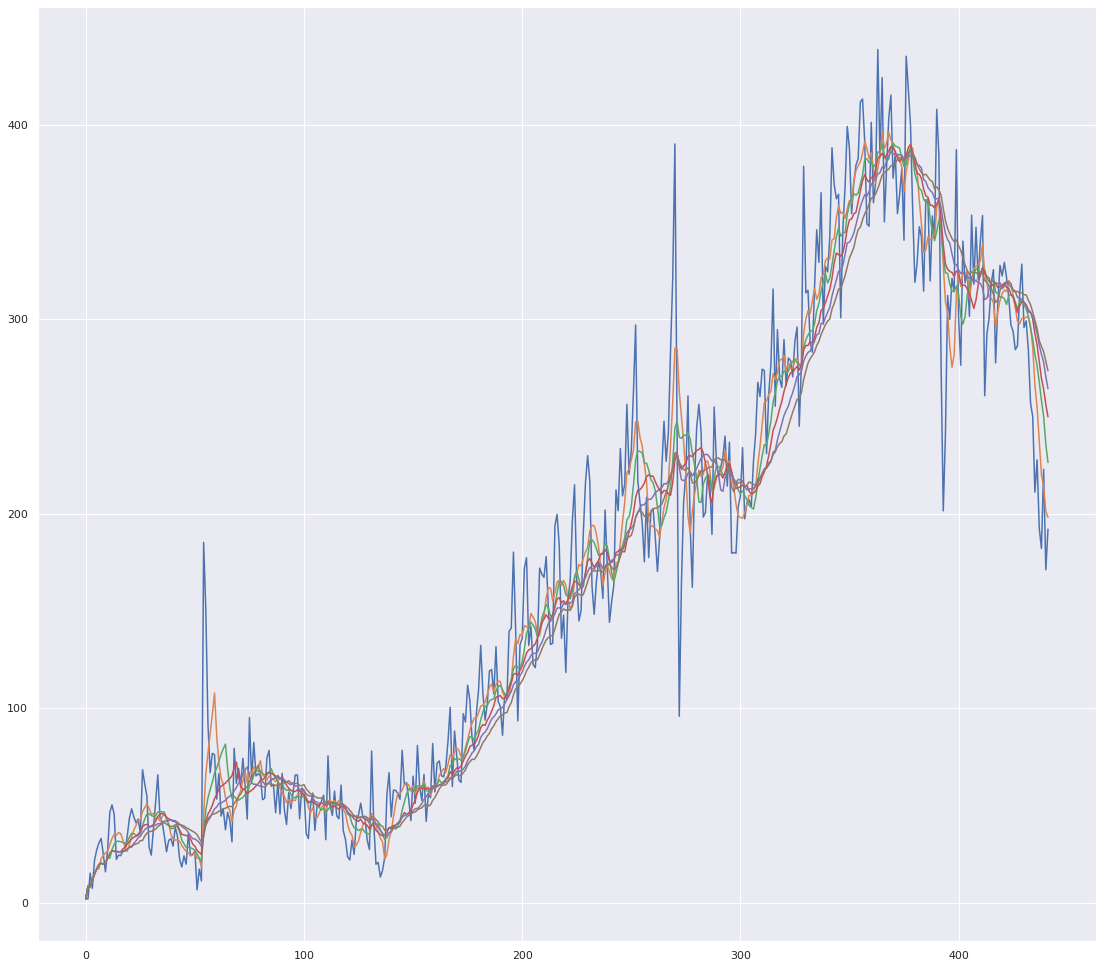

In [287]:
for p in range(1,30,5):
    K = moving_avarage_smoothing(df2['sales'],p)
    plt.plot(K)

In [244]:
len(lemon_train_arima_data['date'].unique())

442

In [291]:
smothing_train_set = moving_avarage_smoothing(df2['sales'],30)
smothing_test_set = moving_avarage_smoothing(df2['sales'],30)

In [242]:
lemon_train_arima_data.count()

SKU                  36264
Category             36264
Type                 36264
lagerUnitQuantity    36264
trademark                0
countryOfOrigin          0
Group                36264
ID                   36264
geoCluster           36264
date                 36264
price                36264
sales                36264
dtype: int64

In [292]:
from pmdarima.arima import auto_arima
model = auto_arima(df2['sales'], trace=True, error_action='ignore', suppress_warnings=True, )
model.fit(df3['sales'])
forecast = model.predict(n_periods=len(df3['sales']))
forecast = pd.DataFrame(forecast,index = df3['sales'].index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4187.958, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4271.476, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4259.010, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4241.208, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4269.620, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4190.899, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4188.972, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4188.487, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4187.116, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4191.748, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4189.845, Time=0.35 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4186.848, Time=0.68 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4186.751, Time=0.31 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4191.519, Time=0.47 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept

In [293]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(df3['sales'],forecast))
print("RMSE: ", rms)

RMSE:  25.57887440200099


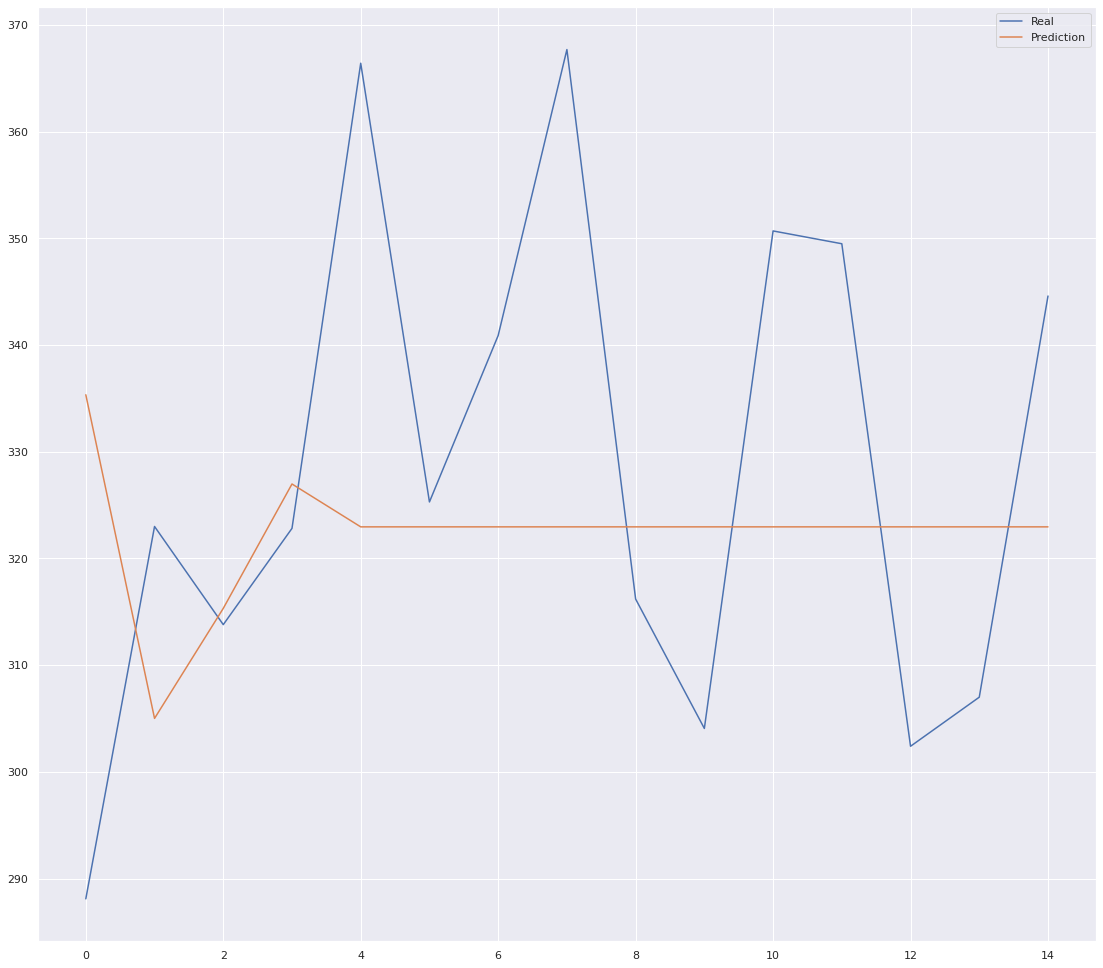

In [294]:
plt.plot(df3['sales'].array)
plt.plot(forecast['Prediction'].array)
plt.legend(["Real", "Prediction"])

In [216]:
import statsmodels as sm
mod = sm.tsa.arima.model.ARIMA(lemon_train_arima_data['sales'], order=(1, 0, 1))
res = mod.fit()
print(res.summary())

/home/vladka/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/vladka/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/vladka/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                36264
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -63480.688
Date:                Sat, 30 Apr 2022   AIC                         126969.377
Time:                        19:30:30   BIC                         127003.371
Sample:                             0   HQIC                        126980.187
                              - 36264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1085      0.087     24.342      0.000       1.939       2.278
ar.L1          0.9913      0.001   1629.888      0.000       0.990       0.992
ma.L1         -0.9129      0.002   -440.860      0.0